# Milestone 1

## Muhammad Galang Al-Hakim

## HCK - 004

# Big Query

SELECT  
  CAST(limit_balance AS INT64) AS limit_balance, 
  CAST(sex AS INT64) AS sex, 
  CAST(education_level AS INT64) AS education_level, 
  CAST(marital_status AS INT64) AS marital_status, 
  CAST(age AS INT64) AS age, 
  CAST(pay_0 AS INT64) AS pay_0, 
  CAST(pay_2 AS INT64) AS pay_2, 
  CAST(pay_3 AS INT64) AS pay_3, 
  CAST(pay_4 AS INT64) AS pay_4, 
  CAST(pay_5 AS FLOAT64) AS pay_5, 
  CAST(pay_6 AS FLOAT64) AS pay_6, 
  CAST(bill_amt_1 AS INT64) AS bill_amt_1, 
  CAST(bill_amt_2 AS INT64) AS bill_amt_2, 
  CAST(bill_amt_3 AS INT64) AS bill_amt_3, 
  CAST(bill_amt_4 AS INT64) AS bill_amt_4, 
  CAST(bill_amt_5 AS INT64) AS bill_amt_5, 
  CAST(bill_amt_6 AS INT64) AS bill_amt_6, 
  CAST(pay_amt_1 AS INT64) AS pay_amt_1, 
  CAST(pay_amt_2 AS INT64) AS pay_amt_2, 
  CAST(pay_amt_3 AS INT64) AS pay_amt_3, 
  CAST(pay_amt_4 AS INT64) AS pay_amt_4, 
  CAST(pay_amt_5 AS INT64) AS pay_amt_5, 
  CAST(pay_amt_6 AS INT64) AS pay_amt_6, 
  CAST(default_payment_next_month AS INT64) AS default_payment_next_month
FROM `bigquery-public-data.ml_datasets.credit_card_default` LIMIT 8000

In [ ]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


# Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import make_pipeline as imbPipeline
from imblearn.over_sampling import SMOTE


#model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#evaluasi
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay 
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

#save model
import joblib

# Data Loading

In [2]:
df = pd.read_csv('P1W2M1.csv')
df

In [3]:
df.head(10)

In [4]:
df.tail(10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2965 entries, 0 to 2964
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   limit_balance               2965 non-null   int64  
 1   sex                         2965 non-null   int64  
 2   education_level             2965 non-null   int64  
 3   marital_status              2965 non-null   int64  
 4   age                         2965 non-null   int64  
 5   pay_0                       2965 non-null   int64  
 6   pay_2                       2965 non-null   int64  
 7   pay_3                       2965 non-null   int64  
 8   pay_4                       2965 non-null   int64  
 9   pay_5                       2965 non-null   float64
 10  pay_6                       2965 non-null   float64
 11  bill_amt_1                  2965 non-null   int64  
 12  bill_amt_2                  2965 non-null   int64  
 13  bill_amt_3                  2965 

In [6]:
df.describe()

In [7]:
df.isna().sum()

In [8]:
df.duplicated().sum()

1

In [9]:
df = df.drop_duplicates()

In [10]:
df.nunique()

# Exploration Data Analysis (EDA)

In [11]:
df.groupby('default_payment_next_month').mean()

In [12]:
df.groupby('default_payment_next_month').count()

<AxesSubplot: xlabel='age'>

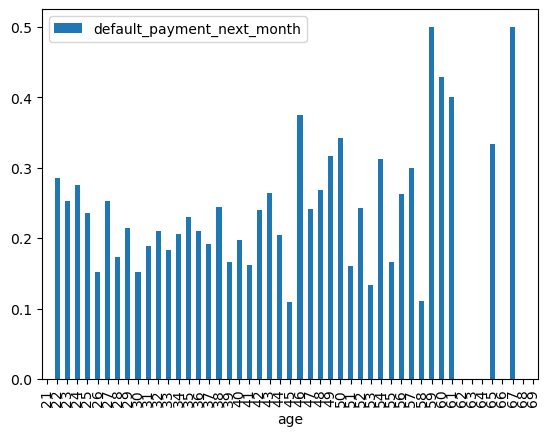

In [13]:
df.groupby('age')[['default_payment_next_month']].mean().plot(kind='bar')

<AxesSubplot: xlabel='sex'>

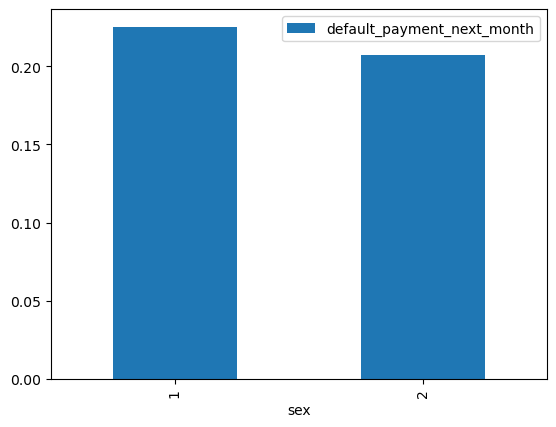

In [14]:
df.groupby('sex')[['default_payment_next_month']].mean().plot(kind='bar')

<AxesSubplot: xlabel='marital_status'>

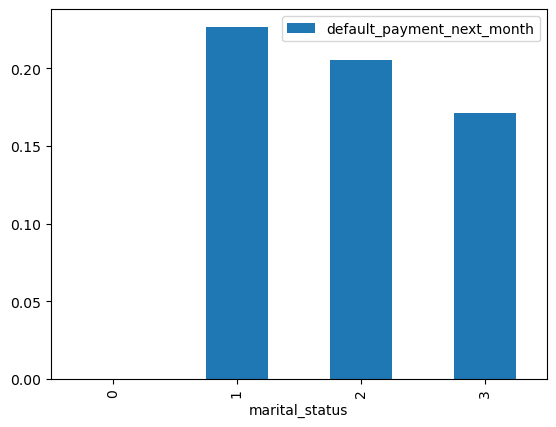

In [15]:
df.groupby('marital_status')[['default_payment_next_month']].mean().plot(kind='bar')

<AxesSubplot: xlabel='education_level'>

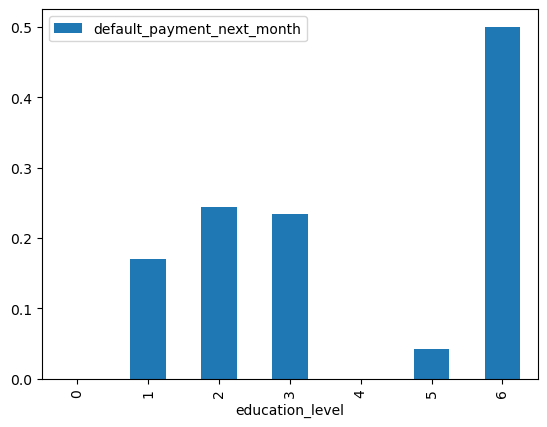

In [16]:
df.groupby('education_level')[['default_payment_next_month']].mean().plot(kind='bar')

<AxesSubplot: xlabel='limit_balance'>

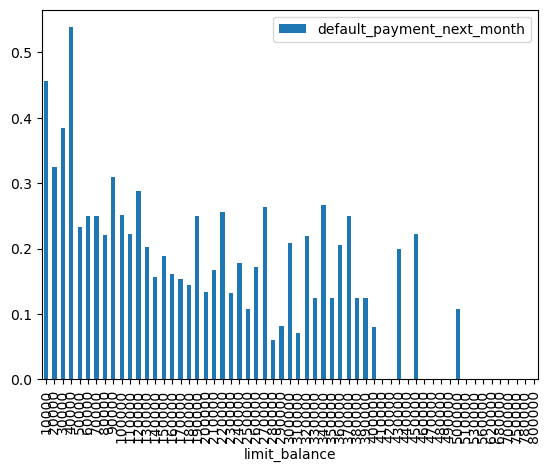

In [17]:
df.groupby('limit_balance')[['default_payment_next_month']].mean().plot(kind='bar')

# Data Preprocessing

## Feature Selection

In [18]:
num_col = ['limit_balance', 'age', 'bill_amt_1', 'bill_amt_2', 'bill_amt_3', 'bill_amt_4', 'bill_amt_5', 'bill_amt_6', 'pay_amt_1', 'pay_amt_2', 'pay_amt_3', 'pay_amt_4', 'pay_amt_5', 'pay_amt_6']
cat_col = ['sex', 'education_level', 'marital_status', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

## Data Split

In [19]:
|X = df.drop(['default_payment_next_month'],axis=1)
y = df['default_payment_next_month']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100, stratify=y)
print('Original set  ---> ',X.shape,y.shape,'\nTraining set  ---> ',X_train.shape,y_train.shape,'\nTesting set   ---> ', X_test.shape,'', y_test.shape)

Original set  --->  (2965, 23) (2965,) 
Training set  --->  (2372, 23) (2372,) 
Testing set   --->  (593, 23)  (593,)


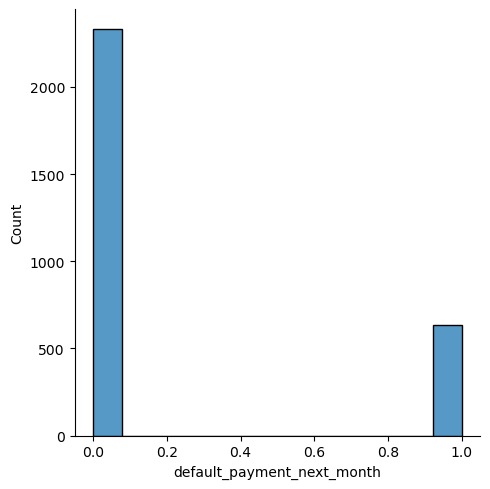

In [21]:
sns.displot(df['default_payment_next_month'])

In [22]:
X_train

In [43]:
cat_col

['sex',
 'education_level',
 'marital_status',
 'pay_0',
 'pay_2',
 'pay_3',
 'pay_4',
 'pay_5',
 'pay_6']

In [53]:
X_train.pay_6.unique()

array([-2.,  0., -1.,  2.,  3.,  4.,  6.,  7.])

# Preprocessing

## Pipeline

In [54]:
# define the preprocessing steps for categorical and numerical columns
cat_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(categories=[[1, 2], [0, 1, 2, 3, 4, 5, 6], [0, 1, 2, 3], [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8], [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7], [-2, -1, 0, 2, 3, 4, 5, 6, 7], [-2, -1, 0, 2, 3, 4, 5, 6, 7, 8], [-2, -1, 0, 2, 3, 4, 5, 6, 7], [-2, -1, 0, 2, 3, 4, 6, 7]]))
])

num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()), 
    ('pca',PCA(n_components=6))
])

# create the column transformer to apply the preprocessing steps to the data
preprocessor = ColumnTransformer(transformers=[
    ('cat', cat_transformer, cat_col),
    ('num', num_transformer, num_col)
])

# create the pipeline to apply the logistic regression, decision tree classifier,
# support vector machine, random forest, naive bayes, knn, adaboost, and xgboost models
pipeline_tuned = imbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('sampling', SMOTE()),
    ('classifier', None)
])

# define the models to be applied in the pipeline
models = [LogisticRegression(), DecisionTreeClassifier(), SVC(), RandomForestClassifier(),
          GaussianNB(), KNeighborsClassifier(), AdaBoostClassifier()]

# train and evaluate each model using cross-validation
from sklearn.model_selection import cross_val_score

for model in models:
    pipeline_tuned.set_params(classifier=model)
    scores_train = cross_val_score(pipeline, X_train, y_train, cv=5)
    scores_test = cross_val_score(pipeline, X_test, y_test, cv=5)
    print(f'{type(model).__name__} Accuracy: {scores_train.mean():.3f} (+/- {scores_train.std():.3f})')
    print(f'{type(model).__name__} Accuracy: {scores_test.mean():.3f} (+/- {scores_test.std():.3f})')

TypeError: got an unexpected keyword argument 'steps'

# Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# create a dictionary of hyperparameters for each model
logreg_params = {'classifier__solver':['lbfgs','liblinier'],
                 'classifier__penalty': ['l1', 'l2'], 
                 'classifier__C': [0.01, 0.1, 1, 10, 100]}

dt_params = {'classifier__criterion': ['gini', 'entropy'], 
             'classifier__max_depth': [5, 10, 15, 20, None],
             'classifier__min_samples_split': [2, 5, 10, 15]}

svm_params = {'classifier__C': [0.01, 0.1, 1, 10, 100], 
              'classifier__kernel': ['linear', 'rbf','poly']}

rf_params = {'classifier__n_estimators': [100, 300],
             'classifier__max_depth': [5, 10, 15, 20],
             'classifier__min_samples_split': [2, 5, 10, 15],
             'classifier__max_features': ['auto', 'sqrt']}

nb_params = {}

knn_params = {'classifier__n_neighbors': [5, 10, 15, 20], 
              'classifier__weights': ['uniform', 'distance'],
              'classifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

ada_params = {'classifier__n_estimators': [50, 100, 150], 
              'classifier__learning_rate': [0.01, 0.1, 1, 10]}

# create a dictionary of hyperparameters for each model
param_grid = {
    'LogisticRegression': logreg_params,
    'DecisionTreeClassifier': dt_params,
    'SVM': svm_params,
    'RandomForestClassifier': rf_params,
    'GaussianNB': nb_params,
    'KNeighborsClassifier': knn_params,
    'AdaBoostClassifier': ada_params,
}

# create a dictionary of models
models = {
    'LogisticRegression': LogisticRegression(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'SVM': SVC(),
    'RandomForestClassifier': RandomForestClassifier(),
    'GaussianNB': GaussianNB(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
}

# loop through each model and its corresponding hyperparameters to perform grid search cross-validation
for model_name, model in models.items():
    pipeline.set_params(classifier=model)
    if model_name in param_grid:
        grid_search = GridSearchCV(pipeline, param_grid[model_name], cv=5)
        grid_search.fit(X_train, y_train)
        print(f'{model_name} Best Parameters: {grid_search.best_params_}')
        print(f'{model_name} Best Score: {grid_search.best_score_}')

LogisticRegression Best Parameters: {'classifier__C': 10, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}
LogisticRegression Best Score: 0.8224437041972019


DecisionTreeClassifier Best Parameters: {'classifier__criterion': 'gini', 'classifier__max_depth': 5, 'classifier__min_samples_split': 15}
DecisionTreeClassifier Best Score: 0.825816566733289


SVM Best Parameters: {'classifier__C': 0.1, 'classifier__kernel': 'poly'}
SVM Best Score: 0.830031534532534


RandomForestClassifier Best Parameters: {'classifier__max_depth': 5, 'classifier__max_features': 'auto', 'classifier__min_samples_split': 5, 'classifier__n_estimators': 300}
RandomForestClassifier Best Score: 0.8355149900066623


GaussianNB Best Parameters: {}
GaussianNB Best Score: 0.7870077725960472


KNeighborsClassifier Best Parameters: {'classifier__algorithm': 'auto', 'classifier__n_neighbors': 15, 'classifier__weights': 'uniform'}
KNeighborsClassifier Best Score: 0.8211778814123918


AdaBoostClassifier Best Parameters: {'classifier__learning_rate': 0.1, 'classifier__n_estimators': 50}
AdaBoostClassifier Best Score: 0.8342491672218522


# Model Evaluation

## Logistic Regression Classifier


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.97      0.90      1864
           1       0.75      0.29      0.42       508

    accuracy                           0.83      2372
   macro avg       0.79      0.63      0.66      2372
weighted avg       0.82      0.83      0.80      2372

ROC AUC Score: 0.6322572741712007

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.97      0.90       466
           1       0.71      0.29      0.41       127

    accuracy                           0.82       593
   macro avg       0.77      0.63      0.65       593
weighted avg       0.81      0.82      0.79       593

ROC AUC Score: 0.6295748707377243


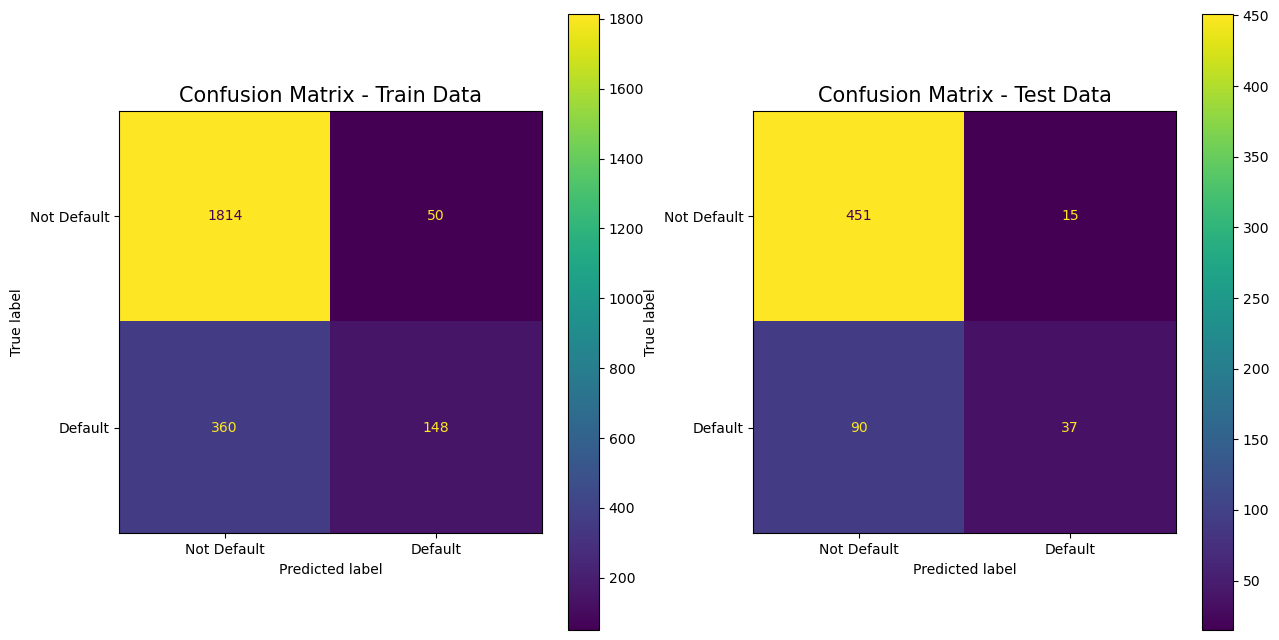

In [ ]:
pipeline_tuned = pipeline.fit(X_train, y_train)
# create subplots with size of 15 x 8
fig, ax = plt.subplots(nrows=1, ncols= 2, figsize=(15,8))

# fit the pipeline on the training data
pipeline_tuned.set_params(classifier=LogisticRegression(C=10, penalty='l2', solver='lbfgs', random_state=42))
pipeline_tuned.fit(X_train, y_train)

# make predictions on the test data
y_pred1 = pipeline_tuned.predict(X_train)

# make predictions on the test data
y_pred2 = pipeline_tuned.predict(X_test)

# generate confusion matrix and classification report
cm_train = confusion_matrix(y_train,y_pred1)
display = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['Not Default','Default'])
display.plot(ax = ax[0])
print("\nClassification Report:")
print(classification_report(y_train, y_pred1))
roc_auc = roc_auc_score(y_train, y_pred1)
print(f"ROC AUC Score: {roc_auc}")
ax[0].set_title('Confusion Matrix - Train Data',size = 15)

# generate confusion matrix and classification report
cm_train = confusion_matrix(y_test,y_pred2)
display = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['Not Default','Default'])
display.plot(ax = ax[1])
print("\nClassification Report:")
print(classification_report(y_test, y_pred2))
roc_auc = roc_auc_score(y_test, y_pred2)
print(f"ROC AUC Score: {roc_auc}")
ax[1].set_title('Confusion Matrix - Test Data',size = 15)

# Show the Plots
plt.show()

## Decision Tree Classifier


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1864
           1       0.85      0.70      0.77       508

    accuracy                           0.91      2372
   macro avg       0.89      0.84      0.86      2372
weighted avg       0.91      0.91      0.91      2372

ROC AUC Score: 0.8359995437802035

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       466
           1       0.51      0.39      0.44       127

    accuracy                           0.79       593
   macro avg       0.68      0.65      0.66       593
weighted avg       0.77      0.79      0.78       593

ROC AUC Score: 0.6453482477780407


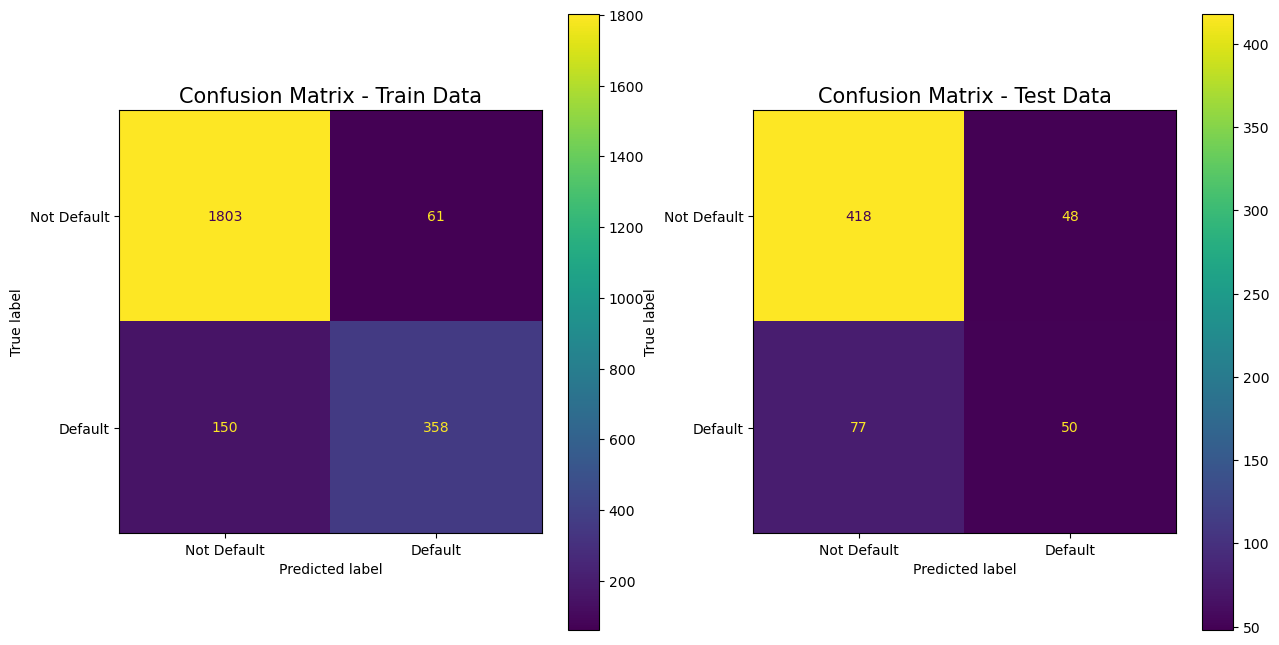

In [ ]:
pipeline_tuned = pipeline.fit(X_train, y_train)
# create subplots with size of 15 x 8
fig, ax = plt.subplots(nrows=1, ncols= 2, figsize=(15,8))

# fit the pipeline on the training data
pipeline_tuned.set_params(classifier=DecisionTreeClassifier(criterion='gini', max_depth=20, min_samples_split=15, random_state=42))
pipeline_tuned.fit(X_train, y_train)

# make predictions on the test data
y_pred1 = pipeline_tuned.predict(X_train)

# make predictions on the test data
y_pred2 = pipeline_tuned.predict(X_test)

# generate confusion matrix and classification report
cm_train = confusion_matrix(y_train,y_pred1)
display = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['Not Default','Default'])
display.plot(ax = ax[0])
print("\nClassification Report:")
print(classification_report(y_train, y_pred1))
roc_auc = roc_auc_score(y_train, y_pred1)
print(f"ROC AUC Score: {roc_auc}")
ax[0].set_title('Confusion Matrix - Train Data',size = 15)

# generate confusion matrix and classification report
cm_train = confusion_matrix(y_test,y_pred2)
display = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['Not Default','Default'])
display.plot(ax = ax[1])
print("\nClassification Report:")
print(classification_report(y_test, y_pred2))
roc_auc = roc_auc_score(y_test, y_pred2)
print(f"ROC AUC Score: {roc_auc}")
ax[1].set_title('Confusion Matrix - Test Data',size = 15)

# Show the Plots
plt.show()